# 1.0 Present wrong code from ChatGPT

```Python
# Wrong code (Fix!)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data for 2 assets
asset1 = pd.read_csv('asset1.csv', index_col=0)
asset2 = pd.read_csv('asset2.csv', index_col=0)

# Compute z-scores for each asset
z1 = (asset1 - asset1.mean()) / asset1.std()
z2 = (asset2 - asset2.mean()) / asset2.std()

# Compute the spread between the two assets
z_spread = z1 - z2

# Compute the rolling mean and standard deviation of the spread
spread_mean = z_spread.rolling(30).mean()
spread_std = z_spread.rolling(30).std()

# Compute the upper and lower bounds fot the spread
upper_bound = spread_mean + spread_std * 2
lower_bound = spread_mean - spread_std * 2

# Compute long and short signals
long_signals = (z_spread <= lower_bound)
short_signals = (z_spread >= upper_bound)

# Compute the positions for each asset
asset_1_position = -long_signals + short_signals
asset_2_position = long_signals - short_signals

# Compute the portfloio returns
portfolio_returns = asset_1_position.shift(1) * z1 + asset_2_position.shift(1) * z2

# Compute the total returns
total_returns = portfolio_returns.sum(axis=1)

# Plot the results
plt.plot(total_returns.cumsum())
plt.title('Total returns from pairs trading')
plt.xlabel('Time')
plt.ylabel('Returns')
plt.show()
```

# 2.0 Fix the code

## 2.0. imports

In [15]:
# Wrong code (Fix!)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

## ChatGPT 4.0 ticket suggestions in Brazil:

1. Petrobras (PETR4.SA) and Vale (VALE3.SA):
    Petrobras is a major player in the energy sector, especially oil and gas, while Vale is a leading mining company. Both are impacted by global commodity prices and Brazil's economic climate.
    
2. Itaú Unibanco (ITUB4.SA) and Bradesco (BBDC4.SA):
    These are two of the largest banks in Brazil. Their performance is often influenced by similar macroeconomic factors, including interest rates and domestic economic policies.
3. Ambev (ABEV3.SA) and Heineken Brasil (HEIA3.SA):
    Ambev and Heineken Brasil operate in the beverage sector, particularly in beer production and sales. They might exhibit similar trends due to changes in consumer behavior and economic conditions.

4. Magazine Luiza (MGLU3.SA) and Via Varejo (VVAR3.SA):
    These companies are significant players in the Brazilian retail sector, particularly in online and electronic commerce. They might experience similar market dynamics.

5. Telefônica Brasil (VIVT3.SA) and TIM (TIMS3.SA):
    As major telecommunications companies, their stock prices could be influenced by similar factors such as regulatory changes, technology upgrades, and consumer trends in telecommunications.

In [16]:
# TICKERS = ("MSFT", "AAPL") # Set pairs. Use "random" to generate random prices
# TICKERS = ("random", "random")
TICKERS = ("KO", "PEP")
# TICKERS = ('BTC-USD', 'ETH-USD')


# ChatGPT 4.0 Tickers for Brazil
# TICKERS = ['PETR4.SA', 'VALE3.SA']
# TICKERS = ['ITUB4.SA', 'BBDC4.SA']
# TICKERS = ['ABEV3.SA', 'HEIA3.SA']
# TICKERS = ['MGLU3.SA', 'VVAR3.SA']
# TICKERS = ['VIVT3.SA', 'TIMS3.SA']
# TICKERS = ['BBAS3.SA', 'SANB11.SA']
# TICKERS = ['LREN3.SA', 'NTCO3.SA']
# TICKERS = ['BBSE3.SA', 'PSSA3.SA']
# TICKERS = ['RENT3.SA', 'MULT3.SA']
# TICKERS = ['WEGE3.SA', 'TOTS3.SA']
# TICKERS = ['RADL3.SA', 'PCAR3.SA']
# TICKERS = ['GNDI3.SA', 'HAPV3.SA']
# TICKERS = ['CSNA3.SA', 'USIM5.SA']
# TICKERS = ['IRBR3.SA', 'PSSA3.SA']
# TICKERS = ['YDUQ3.SA', 'CSED3.SA']
# TICKERS = ['GOLL4.SA', 'AZUL4.SA']
# TICKERS = ['BTOW3.SA', 'MELI34.SA']
# TICKERS = ['KLBN11.SA', 'SUZB3.SA']
# TICKERS = ['GGBR4.SA', 'CSNA3.SA']
# TICKERS = ['BRFS3.SA', 'JBSS3.SA']
# TICKERS = ['CPFE3.SA', 'EGIE3.SA']
# TICKERS = ['BPAC11.SA', 'BBDC4.SA']
# TICKERS = ['CYRE3.SA', 'EZTC3.SA']
# TICKERS = ['ENBR3.SA', 'EGIE3.SA']
# TICKERS = ['ELET3.SA', 'ELET6.SA']
# TICKERS = ['MRFG3.SA', 'BRFS3.SA']
# TICKERS = ['CCRO3.SA', 'ECOR3.SA']
# TICKERS = ['BRML3.SA', 'MULT3.SA']
# TICKERS = ['BRAP4.SA', 'VALE3.SA']
# TICKERS = ['GOAU4.SA', 'CSNA3.SA']
# TICKERS = ['GOLL4.SA', 'AZUL4.SA']
# TICKERS = ['HGTX3.SA', 'RADL3.SA']
# TICKERS = ['LAME4.SA', 'LREN3.SA']
# TICKERS = ['SUZB3.SA', 'KLBN11.SA']


# Crypto Tickers
# TICKERS = ["BTC-USD", "ETH-USD"]
# TICKERS = ["ETH-USD", "ADA-USD"]
# TICKERS = ["BTC-USD", "ADA-USD"]
# TICKERS = ["BTC-USD", "XRP-USD"]
# TICKERS = ["BTC-USD", "LTC-USD"]
# TICKERS = ["BTC-USD", "DOGE-USD"]
# TICKERS = ["BTC-USD", "DOT1-USD"]
# TICKERS = ["BTC-USD", "UNI3-USD"]
# TICKERS = ["BTC-USD", "LINK-USD"]
# TICKERS = ["BTC-USD", "BCH-USD"]
# TICKERS = ["BTC-USD", "XLM-USD"]
# TICKERS = ["BTC-USD", "THETA-USD"]
# TICKERS = ["BTC-USD", "USDC-USD"]
# TICKERS = ["BTC-USD", "VET-USD"]
# TICKERS = ["BTC-USD", "FIL-USD"]
# TICKERS = ["BTC-USD", "TRX-USD"]
# TICKERS = ["BTC-USD", "EOS-USD"]
# TICKERS = ["BTC-USD", "AAVE-USD"]
# TICKERS = ["BTC-USD", "XMR-USD"]
# TICKERS = ["BTC-USD", "BSV-USD"]
# TICKERS = ["BTC-USD", "NEO-USD"]
# TICKERS = ["BTC-USD", "ATOM1-USD"]
# TICKERS = ["BTC-USD", "XTZ-USD"]
# TICKERS = ["BTC-USD", "CRO-USD"]
# TICKERS = ["BTC-USD", "MKR-USD"]
# TICKERS = ["BTC-USD", "LEO1-USD"]
# TICKERS = ["BTC-USD", "ALGO-USD"]
# TICKERS = ["BTC-USD", "COMP-USD"]
# TICKERS = ["BTC-USD", "HT-USD"]
# TICKERS = ["BTC-USD", "DAI-USD"]
# TICKERS = ["BTC-USD", "HBAR-USD"]
# TICKERS = ["BTC-USD", "SNX-USD"]
# TICKERS = ["BTC-USD", "DCR-USD"]
# TICKERS = ["BTC-USD", "CEL-USD"]
# TICKERS = ["BTC-USD", "SUSHI-USD"]

START_DATE = "2020-01-01"
END_DATE = "2023-12-31"

## 2.1. Load fake data

In [17]:
# Load data for 2 assets


# Let's create a method for creating assets fake data
def create_fake_assets_data():
    """create the two assets as dataframes"""

    # create a list of feasible percentual random stock returns
    percentual_rets = np.random.normal(0, 0.005, (1000, 2))

    # calculate asset1 prices starting with a value of 100
    assets_1_prices = 100 * np.cumprod(1 + percentual_rets[:, 0])
    assets_2_prices = 100 * np.cumprod(1 + percentual_rets[:, 1])

    return pd.Series(assets_1_prices), pd.Series(assets_2_prices)


asset1, asset2 = create_fake_assets_data()

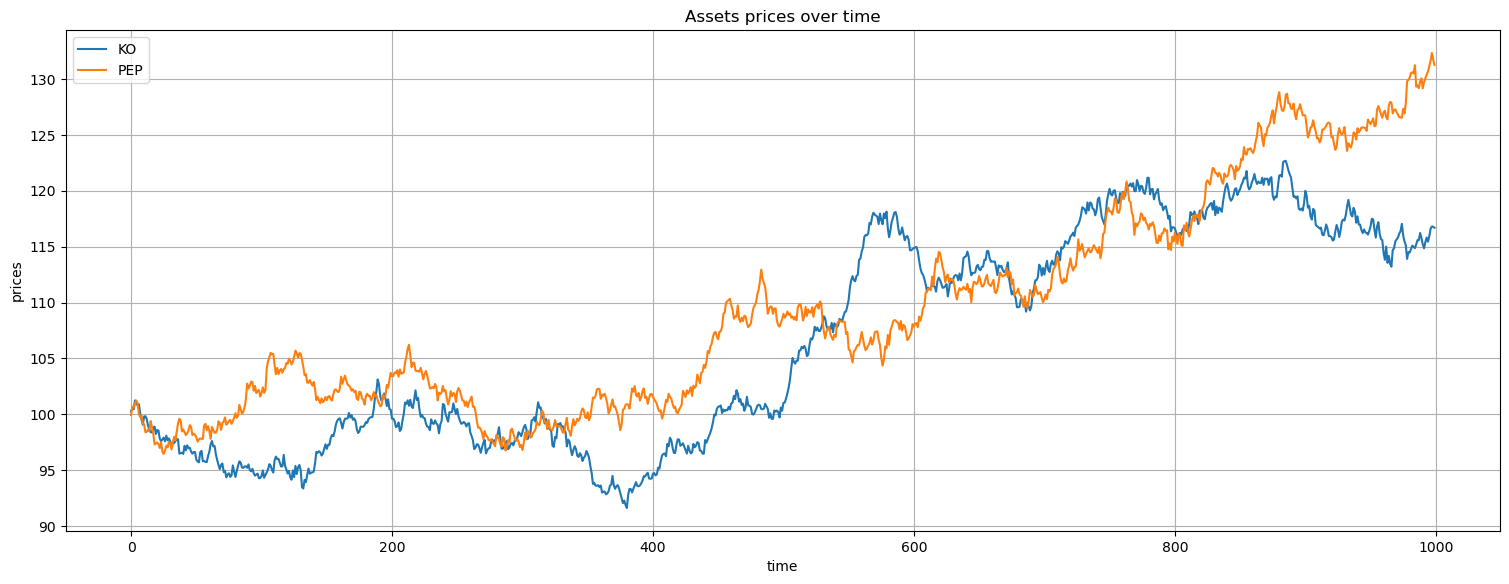

In [18]:
# Plot the assets curves in the same plot
def plot_assets_curves(assets_1_prices, assets_2_prices):
    """plot the assets curves in the same plot"""

    # first create a figure
    fig, ax = plt.subplots()

    # Set size of the figure
    fig.set_size_inches(18.5, 6.5)

    # plot the assets curves
    ax.plot(assets_1_prices, label=TICKERS[0])
    ax.plot(assets_2_prices, label=TICKERS[1])

    # add a legend
    ax.legend()

    # add a title
    ax.set_title("Assets prices over time")

    # add labels to the axes
    ax.set_xlabel("time")
    ax.set_ylabel("prices")

    # add grid
    ax.grid(True)

    # show the plot
    plt.show()


plot_assets_curves(asset1, asset2)

In [19]:
# Let's try load data from Yahoo

# !pip install yfinance

import yfinance as yf


def load_yahoo_data(tickers, start_date, end_date):
    """load data from yahoo finance"""

    # load data
    data = yf.download(tickers, start_date, end_date)

    # select only the adjusted close prices
    data = data["Adj Close"]

    return data


data = load_yahoo_data(TICKERS, START_DATE, END_DATE)

if TICKERS[0] != "random":
    asset1 = data[TICKERS[0]]
if TICKERS[1] != "random":
    asset2 = data[TICKERS[1]]

[*********************100%%**********************]  2 of 2 completed


In [20]:
asset1.tail()

Date
2023-12-22    58.320000
2023-12-26    58.560001
2023-12-27    58.709999
2023-12-28    58.750000
2023-12-29    58.930000
Name: KO, dtype: float64

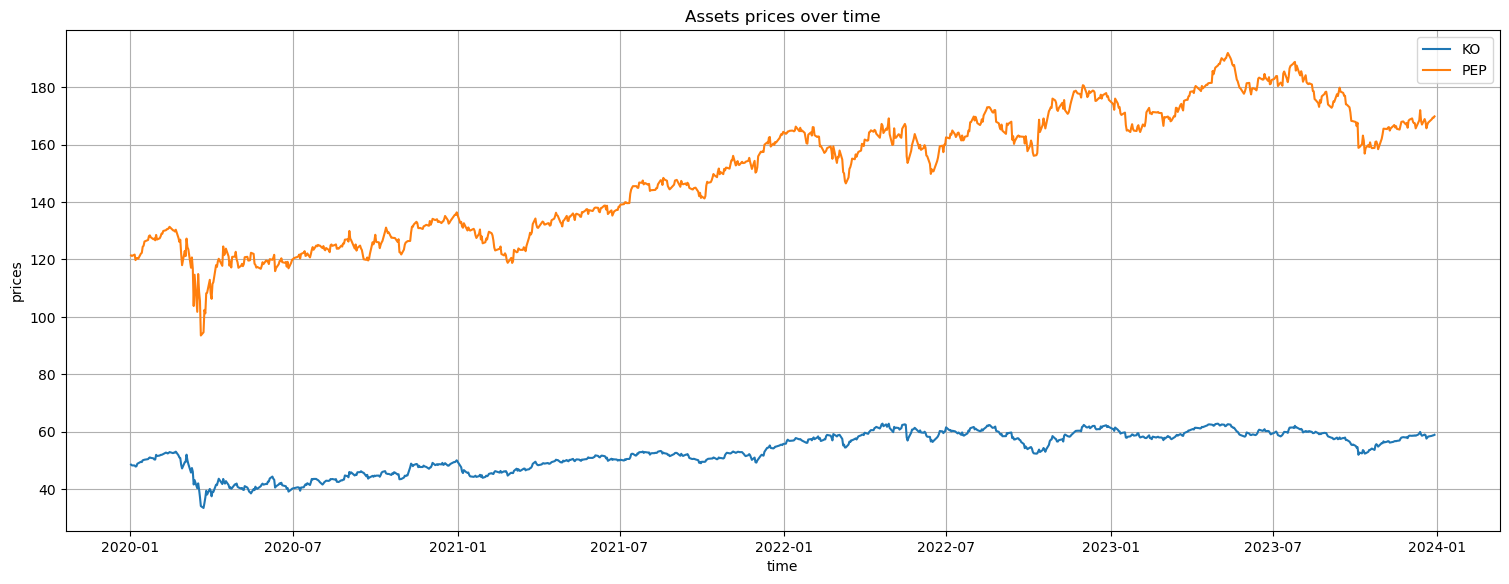

In [21]:
plot_assets_curves(asset1, asset2)

## 2.2. Fix the z-scores computation

The error: when extracting mean and std, whe are using information from future. We need to use information only from past.

In [22]:
# Compute z-scores for each asset
z1 = (asset1 - asset1.rolling(30).mean()) / asset1.rolling(30).std()
z2 = (asset2 - asset2.rolling(30).mean()) / asset2.rolling(30).std()

## 2.3. Continue

In [23]:
# Compute the spread between the two assets

# Old (wrong) way.
# spread = asset1 - asset2

# New way: compute the spread using the z-scores
# Better because it considers the difference in scales for each asset
spread = z1 - z2

# Compute the rolling mean and standard deviation of the spread
spread_mean = spread.rolling(30).mean()
spread_std = spread.rolling(30).std()

# Compute the upper and lower bounds fot the spread
upper_bound = spread_mean + spread_std * 2
lower_bound = spread_mean - spread_std * 2

# Compute long and short signals
long_signals = (spread <= lower_bound).astype(int)
short_signals = (spread >= upper_bound).astype(int)

# Compute signals for asset1 and asset2
asset1_signals = long_signals - short_signals
asset2_signals = -asset1_signals

##### Bruno Strategy #####

# Hold position ultil the signal inverses

# Compute positions for each asset. Position is the latest non-zero signal seen for each asset
# For example:
# asset1_signals = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, -1, 0]
# so, asset1_position = [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1]

asset1_position = asset1_signals.replace(to_replace=0, method="ffill")
asset2_position = asset2_signals.replace(to_replace=0, method="ffill")
asset1_orders = asset1_position.diff().fillna(0).clip(-1, 1).astype(int)


##### Course Strategy #####

# Hol position only ultil next day

# asset1_position = asset1_signals.copy()
# asset2_position = asset2_signals.copy()
# asset1_orders = asset1_position.copy()


# create a three columns print with the signals and positions for asset1
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(pd.concat([asset1_signals, asset1_position, asset1_orders], axis=1))

## 2.4. Let's plot buy and sell orders

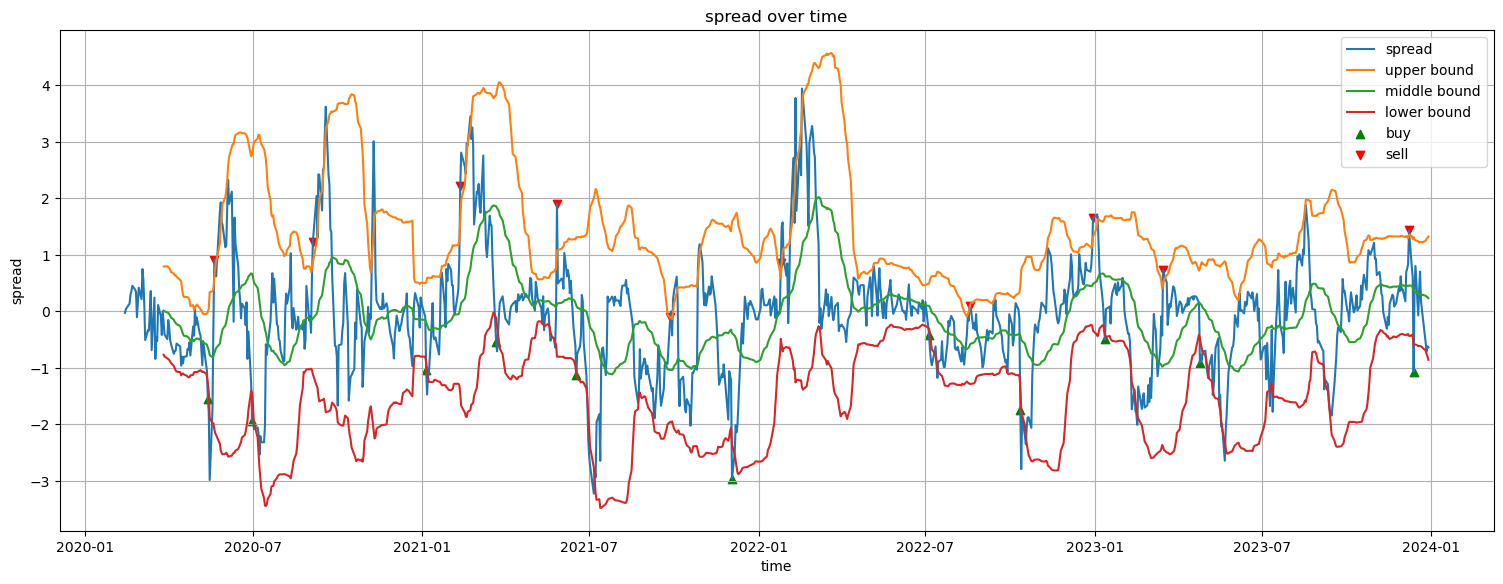

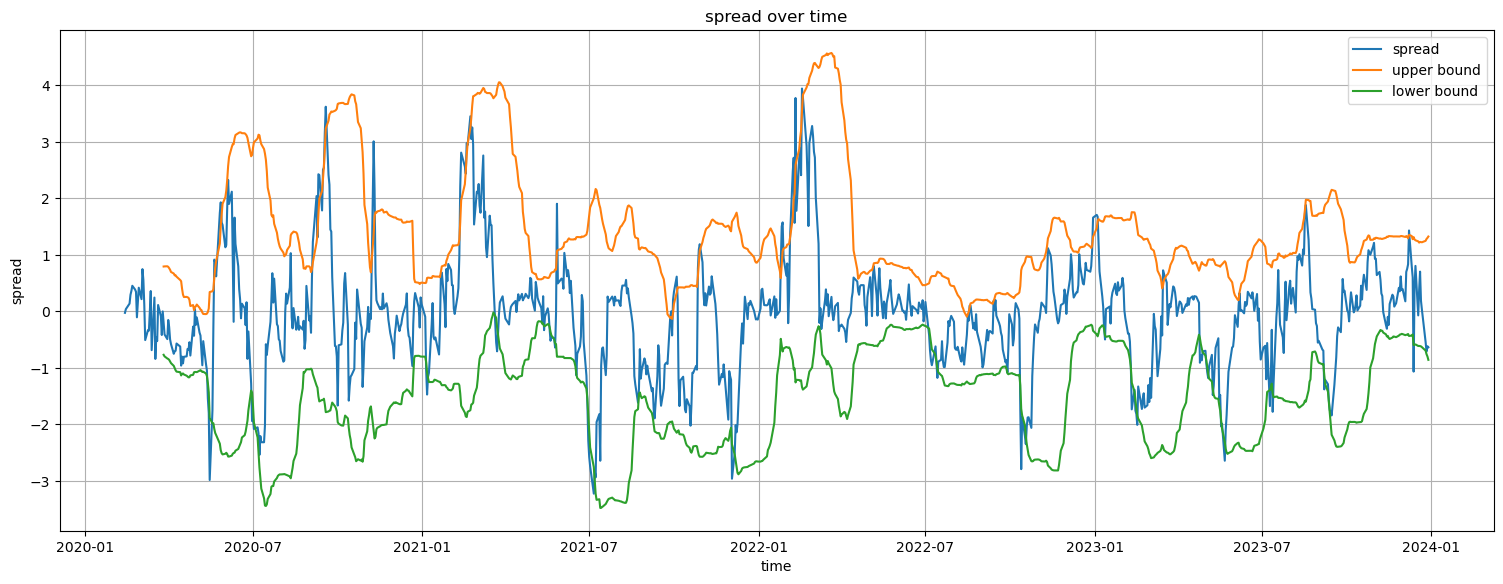

In [24]:
def calculate_bollinger_bands(prices, window_size, num_of_std):
    """calculate the upper, middle and lower bollinger bands for the prices"""

    # Compute the rolling mean and standard deviation of the spread
    spread_mean = prices.rolling(window_size).mean()
    spread_std = prices.rolling(window_size).std()

    # Compute the upper and lower bounds for the spread
    upper_bound = spread_mean + spread_std * num_of_std
    lower_bound = spread_mean - spread_std * num_of_std

    # The middle band is the spread mean
    middle_band = spread_mean

    return upper_bound, middle_band, lower_bound


# Plot the z_spread along with the buy and sell orders
def plot_curve(
    prices,
    label,
    orders=None,
    extra_plots=["upper_bound", "middle_bound", "lower_bound"],
):
    """plot the prices along with the buy and sell orders and the bollinger bands"""

    # first create a figure
    fig, ax = plt.subplots()

    # Set size of the figure
    fig.set_size_inches(18.5, 6.5)

    # plot the z_spread
    ax.plot(prices, label=label)

    # plot the upper and lower bands
    upper_bound, middle_bound, lower_bound = calculate_bollinger_bands(prices, 30, 2)
    "upper_bound" in extra_plots and ax.plot(upper_bound, label="upper bound")
    "middle_bound" in extra_plots and ax.plot(middle_bound, label="middle bound")
    "lower_bound" in extra_plots and ax.plot(lower_bound, label="lower bound")

    if orders is not None:
        # Get the buy orders x
        buy_orders = orders > 0

        buy_x = buy_orders[buy_orders == True].index.tolist()

        # plot buy orders
        ax.scatter(buy_x, prices.loc[buy_x], marker="^", color="green", label="buy")

        # Get the sell orders x
        sell_orders = orders < 0
        sell_x = sell_orders[sell_orders == True].index.tolist()

        # plot sell orders
        ax.scatter(sell_x, prices.loc[sell_x], marker="v", color="red", label="sell")

    # add a legend
    ax.legend()

    # add a title
    ax.set_title(label + " over time")

    # add labels to the axes
    ax.set_xlabel("time")
    ax.set_ylabel(label)

    # add grid
    ax.grid(True)

    # show the plot
    plt.show()


plot_curve(spread, "spread", asset1_orders)
plot_curve(
    spread, "spread", extra_plots=["upper_bound", "lower_bound"]
)  # As instructors

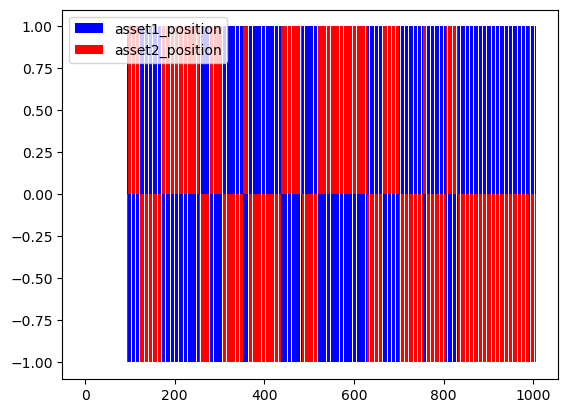

In [25]:
# Assuming asset1_position and asset2_position are lists or arrays of the same length
x = range(len(asset1_position))

plt.bar(x, asset1_position, label="asset1_position", color="blue")
plt.bar(x, asset2_position, label="asset2_position", color="red")
plt.legend()
plt.show()

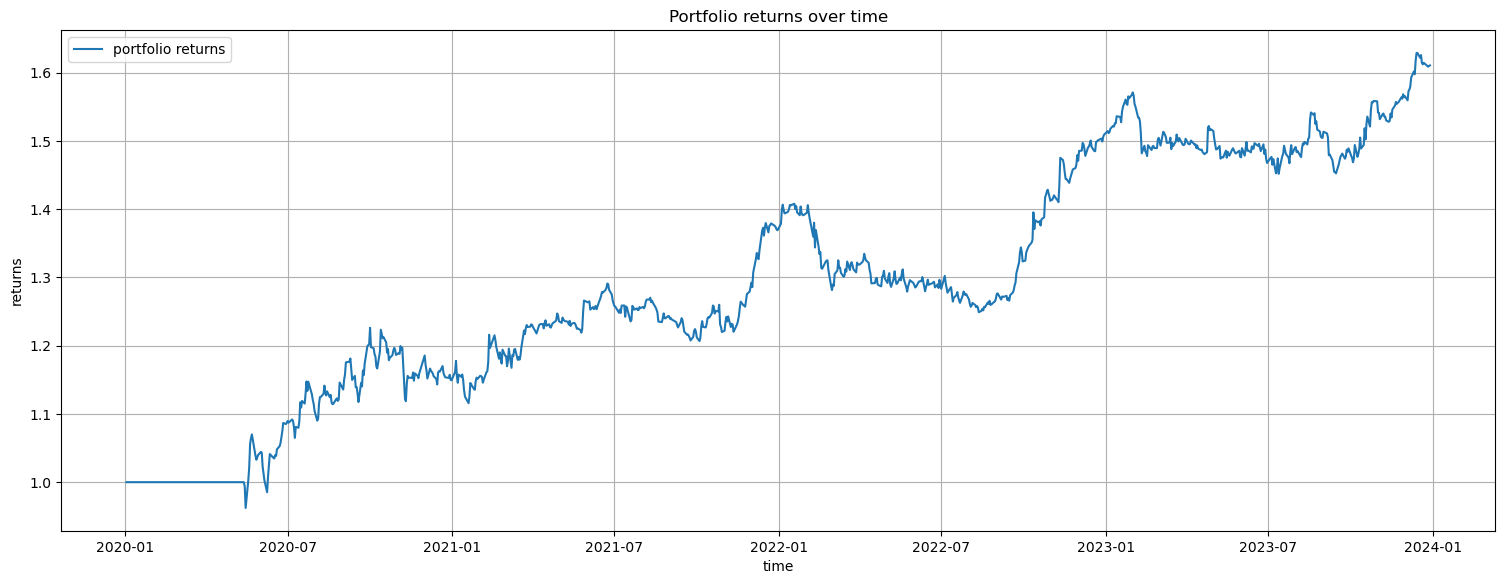

In [26]:
# Compute portfolio returns
portfolio_returns = (
    asset1_position.shift(1) * asset1.pct_change()
    + asset2_position.shift(1) * asset2.pct_change()
)

# Compute the cumulative returns
cumulative_returns = (1 + portfolio_returns).cumprod()


# plot the portfolio returns
def plot_portfolio_returns(portfolio_returns):
    """plot the portfolio returns"""

    # first create a figure
    fig, ax = plt.subplots()

    # Set size of the figure
    fig.set_size_inches(18.5, 6.5)

    # plot the portfolio returns
    ax.plot(portfolio_returns, label="portfolio returns")

    # add a legend
    ax.legend()

    # add a title
    ax.set_title("Portfolio returns over time")

    # add labels to the axes
    ax.set_xlabel("time")
    ax.set_ylabel("returns")

    # add grid
    ax.grid(True)

    # show the plot
    plt.show()


plot_portfolio_returns(cumulative_returns)

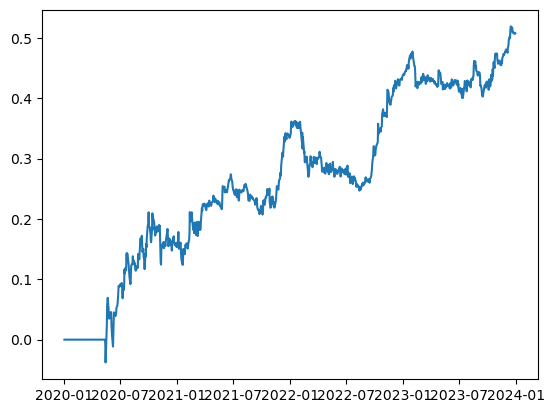

In [27]:
# Plot log returns of portfolio

# compute log rets as in lesson:
asset1_log_rets = np.log(asset1 / asset1.shift(1))
asset2_log_rets = np.log(asset2 / asset2.shift(1))

portfolio_log_returns = (
    asset1_position.shift(1) * asset1_log_rets
    + asset2_position.shift(1) * asset2_log_rets
)

# Compute portfolio log returns (Bruno Way)
# portfolio_log_returns = np.log(portfolio_returns)

plt.plot(portfolio_log_returns.cumsum())
plt.show()

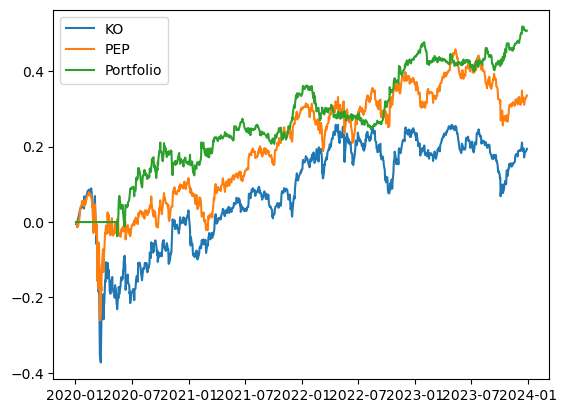

Portfolio Sharpe ratio:  1.0511609065387175
KO  Sharpe ratio:  0.21645291516359524
PEP  Sharpe ratio:  0.36117383241725565


In [28]:
# Compare the performance of the strategy with the performance of the assets (buy-and-hold)
# Using log-returns
plt.plot(np.log(asset1 / asset1.shift(1)).cumsum(), label=TICKERS[0])
plt.plot(np.log(asset2 / asset2.shift(1)).cumsum(), label=TICKERS[1])
plt.plot(portfolio_log_returns.cumsum(), label="Portfolio")
plt.legend()
plt.show()


# Calculate risk-adjusted returns for the portfolio and the assets
# Compute the Sharpe ratio
sharpe_ratio = portfolio_log_returns.mean() / portfolio_log_returns.std() * np.sqrt(
    252
)

# Compute the Sharpe ratio for the assets
asset1_sharpe_ratio = asset1_log_rets.mean() / asset1_log_rets.std() * np.sqrt(252)
asset2_sharpe_ratio = asset2_log_rets.mean() / asset2_log_rets.std() * np.sqrt(252)

# print the Sharpe ratios
print("Portfolio Sharpe ratio: ", sharpe_ratio)
print(TICKERS[0], " Sharpe ratio: ", asset1_sharpe_ratio)
print(TICKERS[1], " Sharpe ratio: ", asset2_sharpe_ratio)


### Comments

#### See the results using Authors (initial) Strategy:

**Plotting:**

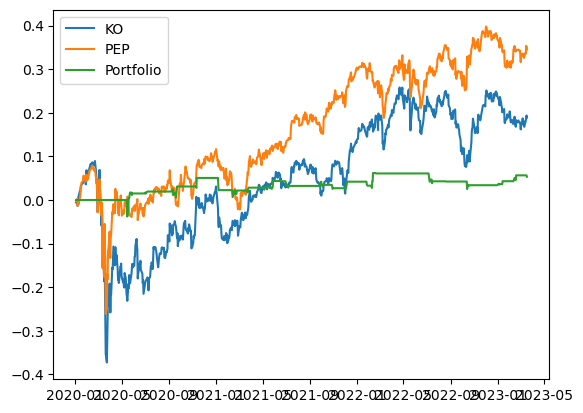

**Sharpe ratios (risk-adjusted return):**

- Portfolio Sharpe ratio:  0.33622512139789706
- KO  Sharpe ratio:  0.24350233904202215
- PEP  Sharpe ratio:  0.4322539379765835

**Notes:**

1. Good performance during starting of the COVID-19 pandemic. So, this strategy tends to performs better than the assets during drawdowns.
2. Lower performance comparing to buy and hold strategy for each of the assets.


----------------------
#### Now See the results using Bruno's Strategy (Equals authors latest strategy):

**Plotting:**

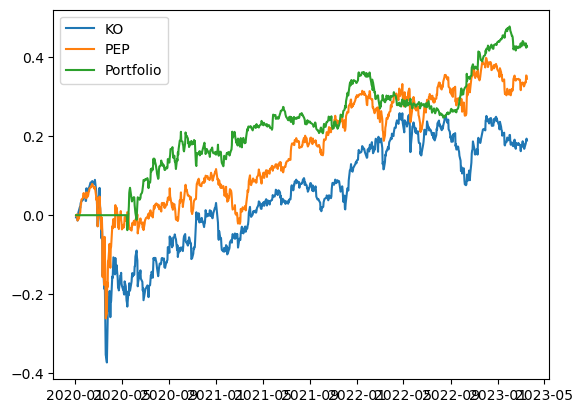

**Sharpe ratios (risk-adjusted return):**

- Portfolio Sharpe ratio:  1.0542282739242839
- KO  Sharpe ratio:  0.2435023303179995
- PEP  Sharpe ratio:  0.4322542762718563


**Notes:**

1. WOOOOW!
2. This strategy performs better than the assets considering all the period.
3. Much better risk-adjusted return than the authors strategy.